# Master BigData UCM 2023

## 1. Datos COVID



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotnine
from plotnine import *

### Carga de datos

A partir del fichero ya guardado en disco de su lectura y primer pre-proceso

In [3]:
covid = pd.read_pickle("datos_covid.pkl")

In [4]:
covid.shape

(1299030, 8)

In [5]:
covid.describe(include = 'all')

/tmp/ipykernel_82374/1103914288.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1274520,1299030,1299030,1299030,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06
unique,52,3,10,817,NaN,NaN,NaN,NaN
top,A,H,0-9,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,24510,433010,129903,1590,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-03-27 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.916877e+00,4.002386e-01,3.815077e-02,7.980339e-02
std,NaN,NaN,NaN,NaN,5.079080e+01,2.523546e+00,3.111570e-01,8.030951e-01
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# 2. Visualizaciones con ggplot

Además del contenido recogido en la docu. teórica, es aconsejable seguir este excelente (y práctico) tutorial:

https://realpython.com/ggplot-python/


## 2.1 Barplot por sexo y edad



In [6]:
covid2 = covid.groupby(['sexo', 'grupo_edad']).sum()
covid2 = pd.DataFrame(covid2.to_records())
mascara_sexo = covid2['sexo'] != 'NC'
mascara_grupo_edad = covid2['grupo_edad'] != 'NC'
covid2 = covid2[mascara_sexo]
covid2 = covid2[mascara_grupo_edad]


/tmp/ipykernel_82374/95940786.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/tmp/ipykernel_82374/95940786.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [7]:
covid2.head()

,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,H,0-9,551217,3357,177,15
1,H,10-19,763076,2377,192,15
2,H,20-29,772281,6644,528,78
3,H,30-39,808255,14199,1392,209
4,H,40-49,970058,31577,3693,747


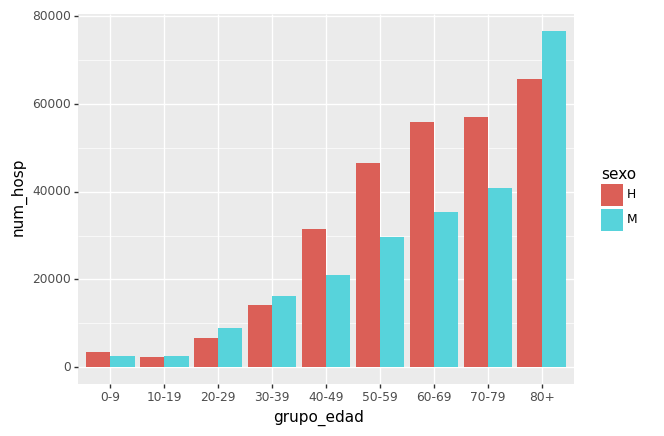

<ggplot: (8780849123133)>

In [8]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity") # Geometric object to use for drawing
   
)

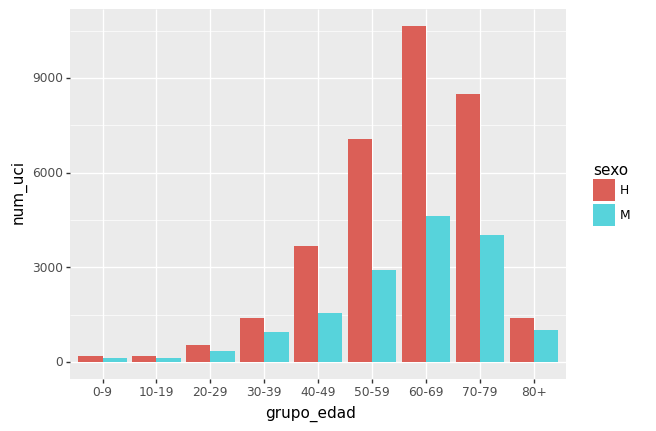

<ggplot: (8780846138702)>

In [9]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_uci',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity") # Geometric object to use for drawing
   
)

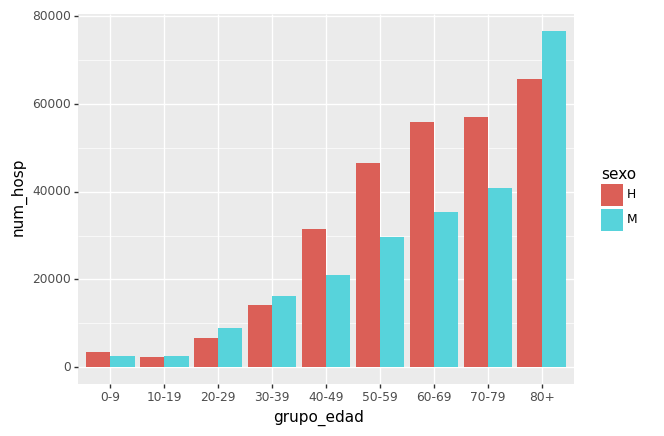

<ggplot: (8780923591795)>

In [10]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_hosp',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity") # Geometric object to use for drawing
   
)

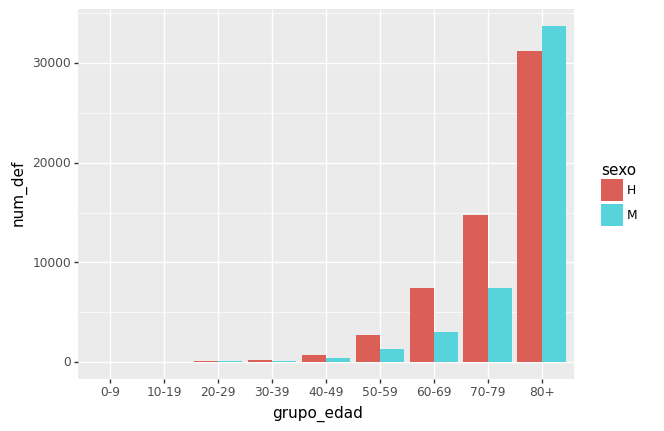

<ggplot: (8780846086111)>

In [11]:
(
    ggplot(covid2)  # What data to use
    + aes('grupo_edad', 
          'num_def',
          fill = 'sexo')  # What variable to use
    + geom_bar(position = "dodge",
               stat = "identity") # Geometric object to use for drawing
   
)

## 2.2 Olas (series temporales)



In [12]:
covid3 = covid.groupby(['sexo', 'fecha']).sum()
covid3 = pd.DataFrame(covid3.to_records())
mascara_sexo = covid3['sexo'] != 'NC'
#mascara_grupo_edad = covid3['grupo_edad'] != 'NC'
covid3 = covid3[mascara_sexo]
#covid2 = covid3[mascara_grupo_edad]


/tmp/ipykernel_82374/1745500608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [13]:
covid3.head()

,sexo,fecha,num_casos,num_hosp,num_uci,num_def
0,H,2020-01-01,0,5,0,0
1,H,2020-01-02,0,43,1,0
2,H,2020-01-03,0,2,0,0
3,H,2020-01-04,0,2,0,0
4,H,2020-01-05,0,3,0,0


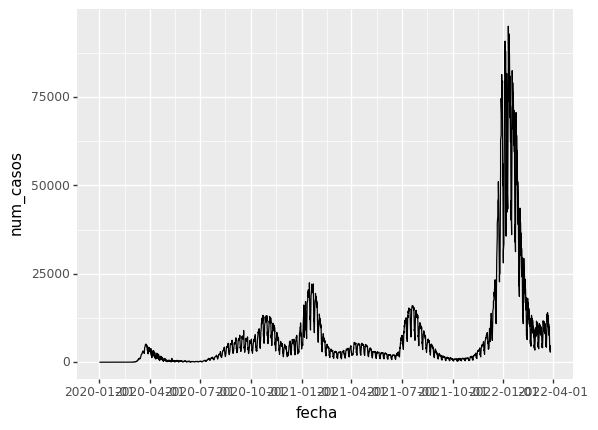

<ggplot: (8780846092069)>

In [14]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
)

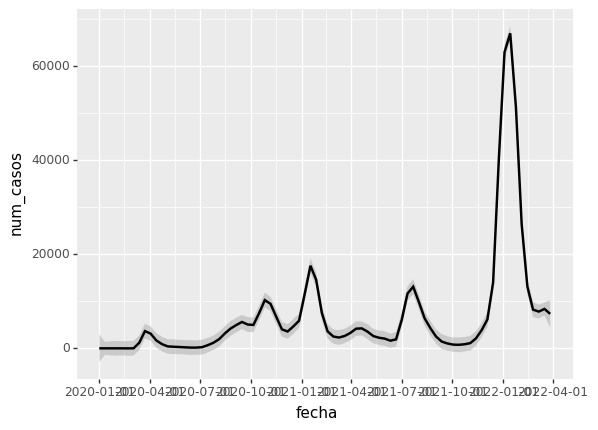

<ggplot: (8780845961826)>

In [15]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos")  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)

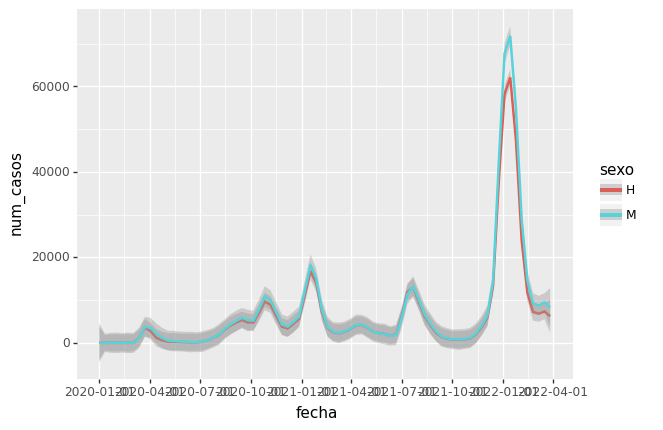

<ggplot: (8780845984189)>

In [16]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_casos",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)

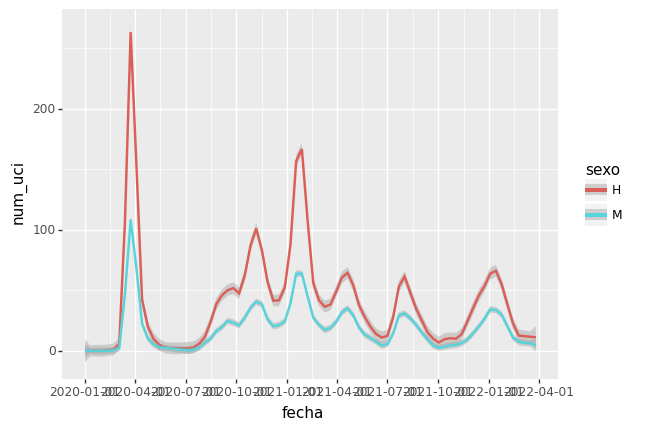

<ggplot: (8780846172935)>

In [17]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_uci",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)

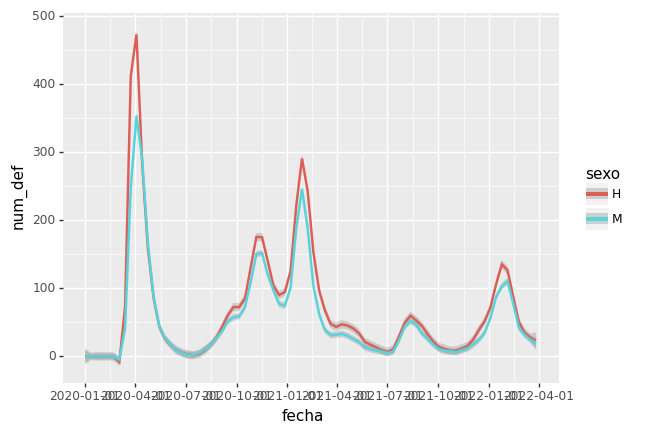

<ggplot: (8780845289271)>

In [18]:
(
    ggplot(covid3)  # What data to use
    + aes(x = "fecha", 
          y = "num_def",
          color = 'sexo')  # What variable to use
    + geom_smooth(method = "loess", 
                  span = 0.05)  # Geometric object to use for drawing
)